### Hi Paul! Thanks for working on this project for our team.
### The CEO and our investors have warmed up to the idea of using machine learning to create our credit risk model. But we need to show them that the new model will provide much better results than our current linear model.

### Our risk team has prepared a data set for you to work with and placed it at the root directory of your workspace. The file is called loan_data.csv. They also placed our current logistic regression model in a pickle file called model.pkl. Please use this data set to train a lightGBM and compare its performance to our current linear model. Later on, our risk analysts will also provide you with the current interest bands so you can evaluate the customer splits your model generates and determine whether it is an improvement respect to our current linear model.

The risk analysts have prepared a data set containing customers' financial and personal information and whether they have defaulted in the past. The file is located at the root of your workspace and is called loan_data.csv. The target variable is called "default".

Please load the data and separate it into a training set containing 70% of the customers and two test sets containing 15% of the customers each.



There are various ways in which you can split the data. For simplicity, please use the train_test_split function from scikit-learn.



First, import pandas and the train_test_split function from scikit-learn:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("loan_data.csv", low_memory=False)

In [4]:
df.head()

,new_customer,income_verification,language,age,gender,country,amount,loan_duration,use_of_loan,education,...,credit_score_equifax,credit_score_ee_mini,nr_previous_loans,amount_previous_loans,previous_repayments,previous_early_repayments,previous_early_repayments_count,default,credit_score_fi_asiakas_c,credit_score_fi_asiakas_n
0,0,expenses_verified,estonian,23,male,EE,5500.0,60,loan_consolidation,secondary,...,NaN,1000.0,1,3000.0,571.73,0.0,0,0,NaN,NaN
1,0,expenses_verified,russian,25,male,EE,1200.0,60,other,vocational,...,NaN,1000.0,1,500.0,194.98,0.0,0,0,NaN,NaN
2,1,unverified,estonian,22,female,EE,1000.0,60,other,basic,...,NaN,700.0,0,0.0,0.00,0.0,0,1,NaN,NaN
3,1,unverified,finnish,49,female,FI,1000.0,60,other,basic,...,NaN,NaN,0,0.0,0.00,0.0,0,0,RL2,NaN
4,0,expenses_verified,estonian,25,female,EE,4100.0,60,loan_consolidation,secondary,...,NaN,1000.0,1,1500.0,1309.03,0.0,0,0,NaN,NaN


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("default", axis=1),
    df["default"],
    test_size=0.30,
    random_state=10,
)

In [6]:
X_eval, X_holdout, y_eval, y_holdout = train_test_split(
    X_test,
    y_test,
    test_size=0.50,
    random_state=10,
)

In [7]:
X_train.shape, X_eval.shape, X_holdout.shape

((52985, 32), (11354, 32), (11354, 32))

In [8]:
y_train.mean(), y_eval.mean(), y_holdout.mean()

(0.5587052939511182, 0.5521402149022371, 0.5517879161528977)

Much of the information we have about our customers comes in the form of strings. For example, gender, marital status, employment, and others. The Python implementation of lightGBM does not support strings. So you need to replace them with numbers.

Please go ahead and identify the categorical variables in the data and replace their values with numbers.



Please use the OrdinalEncoder from scikit-learn to automate the categorical encoding.

In [9]:
cols_cat = list(X_train.select_dtypes(include="O").columns)

In [10]:
cols_cat

['income_verification',
 'language',
 'gender',
 'country',
 'use_of_loan',
 'education',
 'marital_status',
 'employment_status',
 'employment_duration',
 'work_experience',
 'occupation',
 'home_ownership',
 'credit_score_microL',
 'credit_score_equifax',
 'credit_score_fi_asiakas_c']

In [11]:
['income_verification',
 'language',
 'gender',
 'country',
 'use_of_loan',
 'education',
 'marital_status',
 'employment_status',
 'employment_duration',
 'work_experience',
 'occupation',
 'home_ownership',
 'credit_score_microL',
 'credit_score_equifax',
 'credit_score_fi_asiakas_c']

['income_verification',
 'language',
 'gender',
 'country',
 'use_of_loan',
 'education',
 'marital_status',
 'employment_status',
 'employment_duration',
 'work_experience',
 'occupation',
 'home_ownership',
 'credit_score_microL',
 'credit_score_equifax',
 'credit_score_fi_asiakas_c']

In [12]:
X_train[cols_cat].head(10)



,income_verification,language,gender,country,use_of_loan,education,marital_status,employment_status,employment_duration,work_experience,occupation,home_ownership,credit_score_microL,credit_score_equifax,credit_score_fi_asiakas_c
9928,expenses_verified,spanish,female,ES,loan_consolidation,vocational,divorced,fully,MoreThan5Years,15To25Years,healthcare,living_with_parents,M3,A,NaN
112,expenses_verified,finnish,male,FI,other,higher,married,fully,MoreThan5Years,10To15Years,civil_service,mortgage,NaN,NaN,RL3
38685,expenses_verified,spanish,unknown,ES,unknown,secondary,unknown,not_specified,MoreThan5Years,NaN,unknown,owner,M3,B,NaN
71033,unverified,estonian,female,EE,home_improvement,secondary,cohabitant,fully,MoreThan5Years,15To25Years,other,living_with_parents,NaN,NaN,NaN
46868,expenses_verified,estonian,male,EE,unknown,secondary,unknown,not_specified,UpTo1Year,NaN,unknown,living_with_parents,M,NaN,NaN
24591,unverified,estonian,male,EE,unknown,secondary,unknown,not_specified,UpTo3Years,NaN,unknown,living_with_parents,M,NaN,NaN
50391,expenses_verified,russian,female,EE,loan_consolidation,secondary,married,fully,UpTo1Year,15To25Years,other,owner,NaN,NaN,NaN
14393,unverified,estonian,female,EE,other,secondary,cohabitant,fully,MoreThan5Years,MoreThan25Years,finance,owner,NaN,NaN,NaN
59909,unverified,finnish,male,FI,unknown,primary,unknown,not_specified,UpTo1Year,NaN,unknown,owner,M,NaN,NaN
33581,expenses_verified,estonian,female,EE,other,basic,cohabitant,fully,UpTo1Year,LessThan2Years,processing,joint_tenant,NaN,NaN,NaN


In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
enc = OrdinalEncoder()

In [15]:
enc.fit(X_train[cols_cat])


OrdinalEncoder()

In [16]:
enc.categories_

[array(['expenses_verified', 'unverified', 'unverified_by_phone',
        'verified'], dtype=object),
 array(['english', 'estonian', 'finnish', 'other', 'russian', 'spanish'],
       dtype=object),
 array(['female', 'male', 'unknown'], dtype=object),
 array(['EE', 'ES', 'FI', 'SK'], dtype=object),
 array(['business', 'education', 'health', 'home_improvement',
        'loan_consolidation', 'other', 'real_estate', 'travel', 'unknown',
        'vehicle'], dtype=object),
 array(['basic', 'higher', 'primary', 'secondary', 'vocational'],
       dtype=object),
 array(['cohabitant', 'divorced', 'married', 'single', 'unknown', 'widow'],
       dtype=object),
 array(['entrepreneur', 'fully', 'not_specified', 'partially', 'retiree',
        'self_employed', nan], dtype=object),
 array(['MoreThan5Years', 'Other', 'Retiree', 'TrialPeriod', 'UpTo1Year',
        'UpTo2Years', 'UpTo3Years', 'UpTo4Years', 'UpTo5Years', nan],
       dtype=object),
 array(['10To15Years', '15To25Years', '2To5Years', '5To1

In [18]:
X_train_enc = X_train.copy()
X_eval_enc = X_eval.copy()
X_holdout_enc = X_holdout.copy()

In [19]:
X_train_enc[cols_cat] = enc.transform(X_train[cols_cat])
X_eval_enc[cols_cat] = enc.transform(X_eval[cols_cat])
X_holdout_enc[cols_cat] = enc.transform(X_holdout[cols_cat])

In [20]:
X_train_enc[cols_cat].head(10)

,income_verification,language,gender,country,use_of_loan,education,marital_status,employment_status,employment_duration,work_experience,occupation,home_ownership,credit_score_microL,credit_score_equifax,credit_score_fi_asiakas_c
9928,0.0,5.0,0.0,1.0,4.0,4.0,1.0,1.0,0.0,1.0,9.0,3.0,4.0,0.0,NaN
112,0.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,0.0,0.0,3.0,4.0,NaN,NaN,2.0
38685,0.0,5.0,2.0,1.0,8.0,3.0,4.0,2.0,0.0,NaN,18.0,6.0,4.0,3.0,NaN
71033,1.0,1.0,0.0,0.0,3.0,3.0,0.0,1.0,0.0,1.0,11.0,3.0,NaN,NaN,NaN
46868,0.0,1.0,1.0,0.0,8.0,3.0,4.0,2.0,4.0,NaN,18.0,3.0,0.0,NaN,NaN
24591,1.0,1.0,1.0,0.0,8.0,3.0,4.0,2.0,6.0,NaN,18.0,3.0,0.0,NaN,NaN
50391,0.0,4.0,0.0,0.0,4.0,3.0,2.0,1.0,4.0,1.0,11.0,6.0,NaN,NaN,NaN
14393,1.0,1.0,0.0,0.0,5.0,3.0,0.0,1.0,0.0,5.0,8.0,6.0,NaN,NaN,NaN
59909,1.0,2.0,1.0,2.0,8.0,2.0,4.0,2.0,4.0,NaN,18.0,6.0,0.0,NaN,NaN
33581,0.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,4.0,4.0,12.0,2.0,NaN,NaN,NaN


Using the Python API for lightGBM, set up and train a lightGBM model. To speed up training, use callbacks to stop the training if the performance does not improve after 3 iterations. Collect the training results in a dictionary so you can determine if the learning converged.

In [22]:
! pip install lightgbm

  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)


In [23]:
import matplotlib.pyplot as plt
import lightgbm as lgb

In [24]:
gbm = lgb.LGBMClassifier(
    num_iterations=1000,
    random_state=10,
)

In [25]:
evals_result = {}

In [26]:
gbm.fit(
    X_train_enc,
    y_train,
    eval_set=[(X_eval_enc, y_eval)],
    categorical_feature=cols_cat,
    callbacks=[
        lgb.early_stopping(3),
        lgb.record_evaluation(evals_result),
    ],
)

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 29603, number of negative: 23382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2223
[LightGBM] [Info] Number of data points in the train set: 52985, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558705 -> initscore=0.235909
[LightGBM] [Info] Start training from score 0.235909
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.557588


LGBMClassifier(num_iterations=1000, random_state=10)

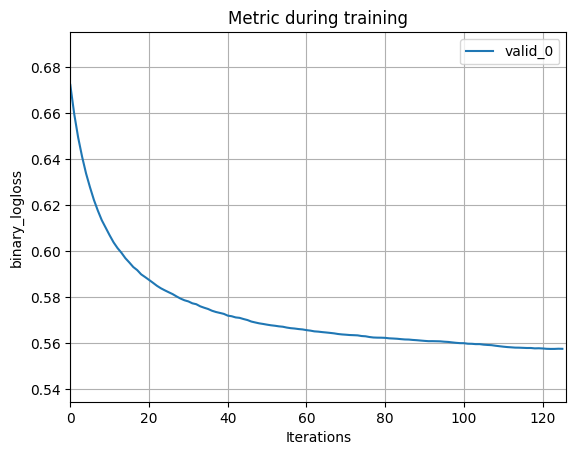

In [27]:
ax = lgb.plot_metric(evals_result, metric='binary_logloss')
plt.show()

Please evaluate the performance of your model in the three datasets by determining the ROC-AUC and the accuracy of the predictions.

In [28]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [29]:
pred_train = gbm.predict_proba(X_train_enc)[:, 1]
pred_eval = gbm.predict_proba(X_eval_enc)[:, 1]
pred_holdout = gbm.predict_proba(X_holdout_enc)[:, 1]

In [30]:
roc_train = roc_auc_score(y_train, pred_train)
roc_eval = roc_auc_score(y_eval, pred_eval)
roc_holdout = roc_auc_score(y_holdout, pred_holdout)

In [31]:
print(f"Train set roc-auc: {roc_train}")
print(f"Eval set roc-auc: {roc_eval}")
print(f"Hold-out set roc-auc: {roc_holdout}")

Train set roc-auc: 0.8200792965564637
Eval set roc-auc: 0.7807894600218679
Hold-out set roc-auc: 0.7721683483318558


In [33]:
pred_train = gbm.predict(X_train_enc)
pred_eval = gbm.predict(X_eval_enc)
pred_holdout = gbm.predict(X_holdout_enc)

In [34]:
acc_train = accuracy_score(y_train, pred_train)
acc_eval = accuracy_score(y_eval, pred_eval)
acc_holdout = accuracy_score(y_holdout, pred_holdout)

In [35]:
print(f"Train set accuracy: {acc_train}")
print(f"Eval set accuracy: {acc_eval}")
print(f"Hold-out set accuracy: {acc_holdout}")

Train set accuracy: 0.7451542889497027
Eval set accuracy: 0.7145499383477188
Hold-out set accuracy: 0.7080324114849392


To understand which features are important to predict customer default, please show us a bar plot with the feature importance returned by your model.

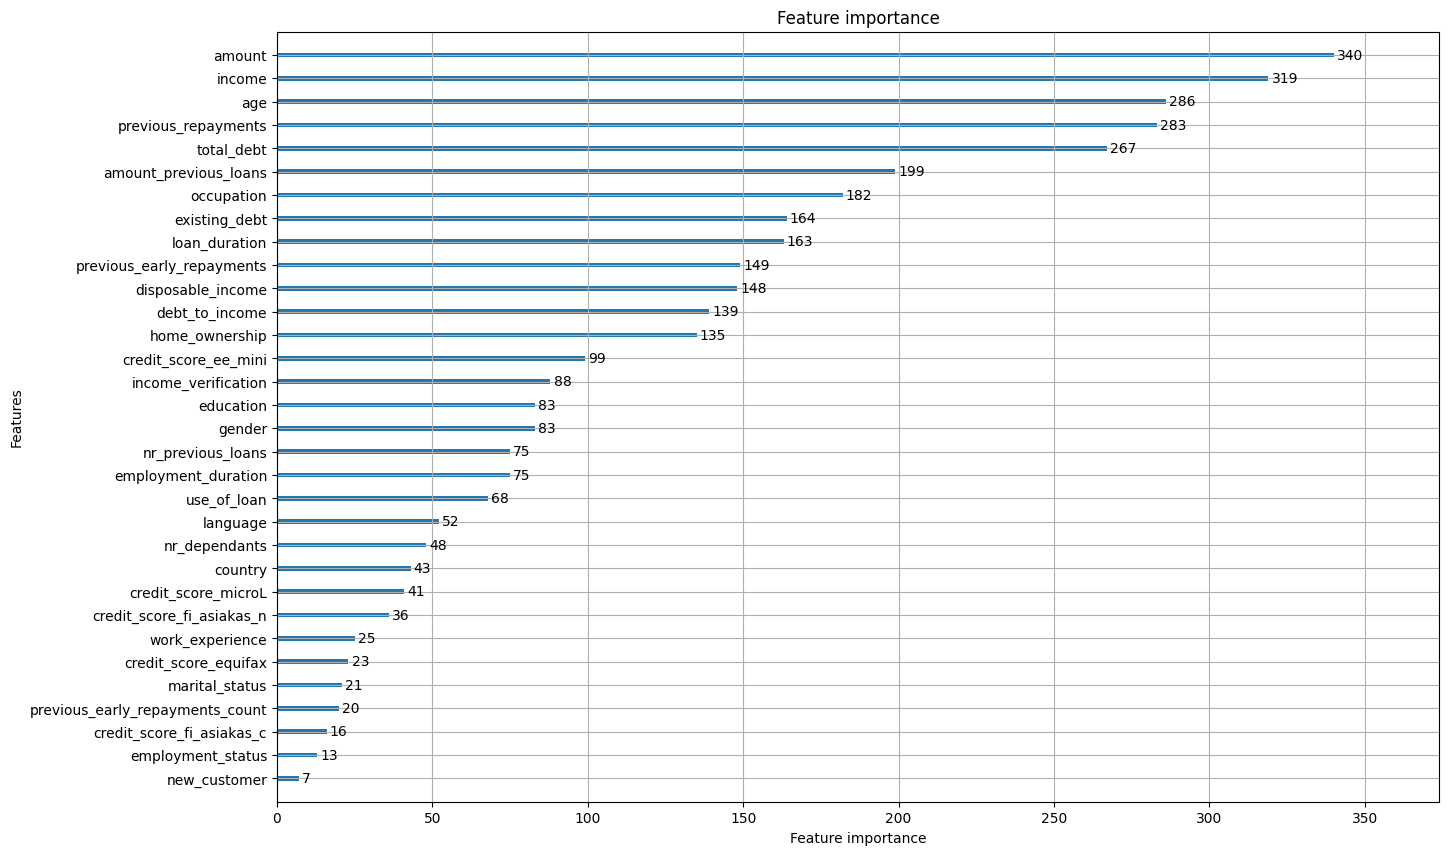

In [36]:
ax = lgb.plot_importance(gbm, figsize=(15, 10))
plt.show()

Unsurprisingly, the amount of money requested by the customer, as well as their income and existing debt, their age, and whether they repaid previous loans, are important indicators of the customer's credit risk.

In [37]:
#To squeeze out the maximum possible performance of the lightGBM, please optimize its hyperparameters utilizing randomized search.
#Import the library stats from scipy to define the hyperparameter space and the randomized search from scikit-learn:

from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

In [38]:
gbm = lgb.LGBMClassifier(
    num_iterations=1000,
    random_state=10,
)

In [39]:
param_grid = dict(
    n_estimators=stats.randint(10, 120),
    num_leaves=stats.randint(1, 100),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0.0001, 1),
)

In [40]:
search = RandomizedSearchCV(
    gbm,
    param_grid,
    scoring='roc_auc',
    cv=3,
    n_iter=150,
    random_state=10,
    refit=True,
)

In [41]:
search.fit(
    X=X_train_enc,
    y=y_train,
    eval_set=[(X_eval_enc, y_eval)],
    categorical_feature=cols_cat,
    callbacks=[lgb.early_stopping(3)],
)

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.569007


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.567157


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.566608


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.590601


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.58549


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.586031


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.584958


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.590009


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.584535


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.581493


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.58146


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.582923


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.583492


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.584911


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579765


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.582626


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.583122


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.588826


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[131]	valid_0's binary_logloss: 0.570202


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[130]	valid_0's binary_logloss: 0.5706


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[126]	valid_0's binary_logloss: 0.571269


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.5823


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.569183


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.573237
[LightGBM] [Info] Number of positive: 19736, number of negative: 15588


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.57005


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.571139


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.575338


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.575089


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.569963


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.568436


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.569651


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[139]	valid_0's binary_logloss: 0.564921


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[102]	valid_0's binary_logloss: 0.570395


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.576586


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early sto

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.581466


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.576674


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.583726


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[147]	valid_0's binary_logloss: 0.572807


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[155]	valid_0's binary_logloss: 0.569552


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[127]	valid_0's binary_logloss: 0.573245


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.586899


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.587894


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.588616


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[325]	valid_0's binary_logloss: 0.565777


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[364]	valid_0's binary_logloss: 0.565207


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.596097


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.584876


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.587541


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.592971


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.586898


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.593524


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.587153


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.58876


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.591245


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.130546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.587018


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.589473


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.586136


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[64]	valid_0's binary_logloss: 0.562302


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.565842


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.563978


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.578643


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.580326


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.579614


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.581469


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.583244


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.582342


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.580934


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.578043


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.57577


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.600514


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[63]	valid_0's binary_logloss: 0.596884


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.597573


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.58026


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.582778


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.576898


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.575046


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.576461
[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002921 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.573754


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.575499


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.5782


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.577042


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.582462


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.582695
[LightGBM] [Info] Number of positive: 19736, number of negative: 15588


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.582517


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[512]	valid_0's binary_logloss: 0.585331


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[675]	valid_0's binary_logloss: 0.58295


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[448]	valid_0's binary_logloss: 0.588115


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.577965


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.578641


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.578727


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.590208


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.590367


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.59162


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.575989


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.574416


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.571788


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.582964


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.582794


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.58472


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of

[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.57998


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.581979


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.582705


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.573013


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.572137


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.572983


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.572562


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.57731


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.576294


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.577643


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.581535


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.576402


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[247]	valid_0's binary_logloss: 0.58158


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[243]	valid_0's binary_logloss: 0.582473


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[194]	valid_0's binary_logloss: 0.585385


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.566442


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.569134


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.569319


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.574578


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.573087


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.570624


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.571093


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.572691


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.571874


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.573009


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.57766


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.573195


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[225]	valid_0's binary_logloss: 0.569351


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.571458


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[256]	valid_0's binary_logloss: 0.567593


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.574941


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.579263


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of

[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.589747


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.589271


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.591927


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.57721


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.575134


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.577431
[LightGBM] [Info] Number of positive: 19735, number of negative: 15588


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[284]	valid_0's binary_logloss: 0.562598


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[155]	valid_0's binary_logloss: 0.568837


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[176]	valid_0's binary_logloss: 0.567665


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.588685


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.587698


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.590352


d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19735, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2215
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558701 -> initscore=0.235892
[LightGBM] [Info] Start training from score 0.235892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19736, number of negative: 15588
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558714 -> initscore=0.235943
[LightGBM] [Info] Start training from score 0.235943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\lightgbm\sklearn.py", line 1284, in fit
    super().fit(
  File "d:\PROJECTS\Personal Projects\personal_projects\per

[LightGBM] [Info] Number of positive: 29603, number of negative: 23382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2223
[LightGBM] [Info] Number of data points in the train set: 52985, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558705 -> initscore=0.235909
[LightGBM] [Info] Start training from score 0.235909
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(num_iterations=1000,
                                            random_state=10),
                   n_iter=150,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020CE67779D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020CE66F3090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020CE67DEF90>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020CE6621E10>},
                   random_state=10, scoring='roc_auc')

In [42]:
search.best_params_


{'learning_rate': 0.06819727353795003,
 'max_depth': 8,
 'n_estimators': 18,
 'num_leaves': 86}

To try and understand if you found the best hyperparameters or if there is room for improvement, plot the ROC-AUC values obtained for each hyperparameter combination evaluated during the search.



In [43]:
results = pd.DataFrame(search.cv_results_)


In [44]:
results.sort_values(by='mean_test_score', ascending=True, inplace=True)

In [45]:
results.reset_index(drop=True, inplace=True)

Text(0.5, 0, 'Hyperparameter combinations')

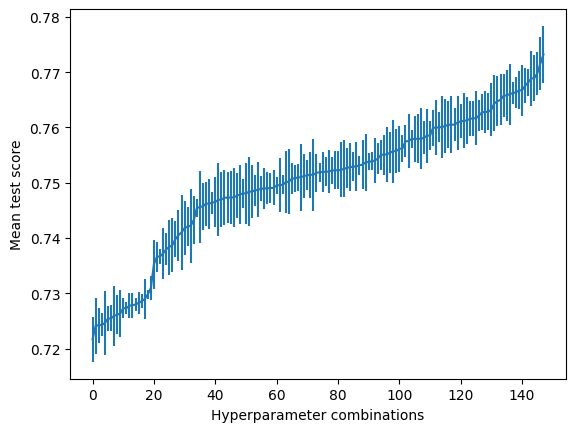

In [46]:
results['mean_test_score'].plot(
    yerr=[results['std_test_score'],
          results['std_test_score']],
    subplots=True)
 
plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

Please evaluate the performance of the new lightGBM model with the optimized hyperparameters by determining the ROC-AUC and its accuracy utilizing the three data set

In [47]:
# Calculate the probability of default in train and test sets:

pred_train = search.predict_proba(X_train_enc)[:,1]
pred_eval = search.predict_proba(X_eval_enc)[:,1]
pred_holdout = search.predict_proba(X_holdout_enc)[:,1]

In [48]:
# Calculate the ROC-AUC:

roc_train = roc_auc_score(y_train, pred_train)
roc_eval = roc_auc_score(y_eval, pred_eval)
roc_holdout = roc_auc_score(y_holdout, pred_holdout)

In [49]:
# Print out the  ROC-AUC values:

print(f"Train set roc-auc: {roc_train}")
print(f"Eval set roc-auc: {roc_eval}")
print(f"Hold-out set roc-auc: {roc_holdout}")

Train set roc-auc: 0.882566408060399
Eval set roc-auc: 0.7892729014317614
Hold-out set roc-auc: 0.7799552639787521


In [50]:
# Predict if the customer will default in train and test sets:

pred_train = search.predict(X_train_enc)
pred_eval = search.predict(X_eval_enc)
pred_holdout = search.predict(X_holdout_enc)

In [51]:
# Calculate the accuracy of the predictions:

acc_train = accuracy_score(y_train, pred_train)
acc_eval = accuracy_score(y_eval, pred_eval)
acc_holdout = accuracy_score(y_holdout, pred_holdout)

In [52]:
# Print out the accuracy values:

print(f"Train set accuracy: {acc_train}")
print(f"Eval set accuracy: {acc_eval}")
print(f"Hold-out set accuracy: {acc_holdout}")

Train set accuracy: 0.796527319052562
Eval set accuracy: 0.7221243614585168
Hold-out set accuracy: 0.7149903117843932


There is not a significant increase in the model performance after the hyperparameter search. If anything else, this model is a tiny bit better. This means that the default parameters of the lightGBM were already well suited.

### We are currently using a linear model to assess credit risk. The analysts have stored a version of the model in the model.pkl file at the root of your workspace.

### After loading the model, you will be able to obtain predictions from the training and testing sets (provided you have not modified the original data).

### Please obtain the ROC-AUC and accuracy values of the linear model to determine if your lightGBM is doing better. Plot the ROC curves for the lightGBM and the linear models.

In [53]:
# Import joblib:
import joblib

In [54]:
# Load the linear model:
logit = joblib.load("model.pkl")

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.1.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\sklearn\base.py:376: Inc